<!-- <img>
<html>
  <head>
  </head>

  <body>
    <img src="image/ai.jpg">
  </body>
</html> -->

---
- About the Author : Sajjad Ali Shah
- Contact: [Linkedin](www.linkedin.com/in/sajjad-ali-shah-120341305)
- Date : 02/10/2024
---

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [7]:
# Load the dataset 
df_train= pd.read_csv("D:/Projects (Kaggle)/Loan Approval Pred/playground-series-s4e10/train.csv")
df_test= pd.read_csv("D:/Projects (Kaggle)/Loan Approval Pred/playground-series-s4e10/test.csv")
df_sample= pd.read_csv("D:/Projects (Kaggle)/Loan Approval Pred/playground-series-s4e10/sample_submission.csv")

In [8]:
# Lets check the first row of the data
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [9]:
# Check the shape of the data
print(f"The number of Rows in dataset       : {df_train.shape[0]}")
print(f"The number of Columns in dataset    : {df_train.shape[1]}")

The number of Rows in dataset       : 58645
The number of Columns in dataset    : 13


In [10]:
# Check the info of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [11]:
# Summary of the train data
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [12]:
# Lets check the info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [13]:
# Check the missing values
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [14]:
# Columns of the dataset
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

# **Lets Explore  with Visualization**

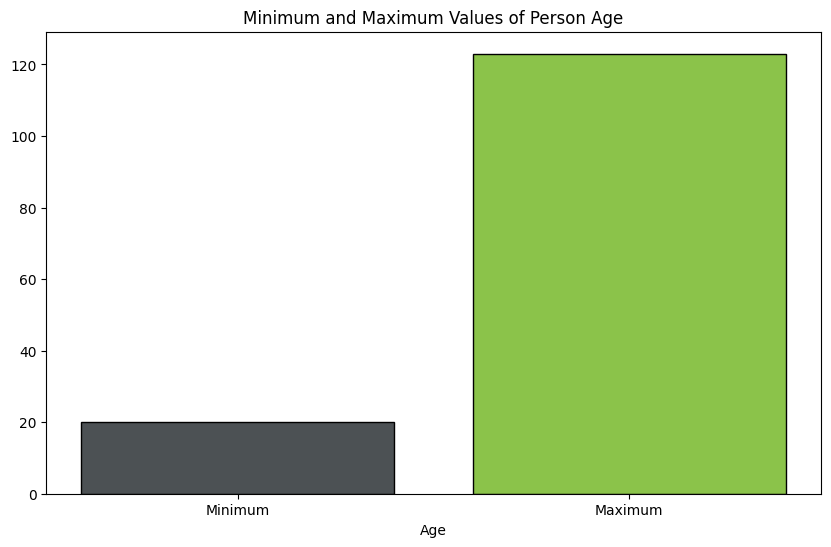

In [15]:
# Lets check the person_age column
min_age = df_train["person_age"].min()
max_age = df_train["person_age"].max()

plt.figure(figsize=(10,6))
plt.bar(['Minimum', 'Maximum'], [min_age, max_age], color=['#4c5154', '#8bc34a'], edgecolor='black', linewidth=1)
plt.xlabel('Age')
plt.title('Minimum and Maximum Values of Person Age')
plt.show()

- Output

The output of this code is a horizontal bar plot with two bars, one representing the minimum age and the other representing the maximum age. The x-axis represents the age values, and the y-axis represents the labels "Minimum" and "Maximum". The plot provides a clear and concise visualization of the minimum and maximum values of the person_age column.

In [16]:
# Lets check the person_home_ownership
df_train["person_home_ownership"].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

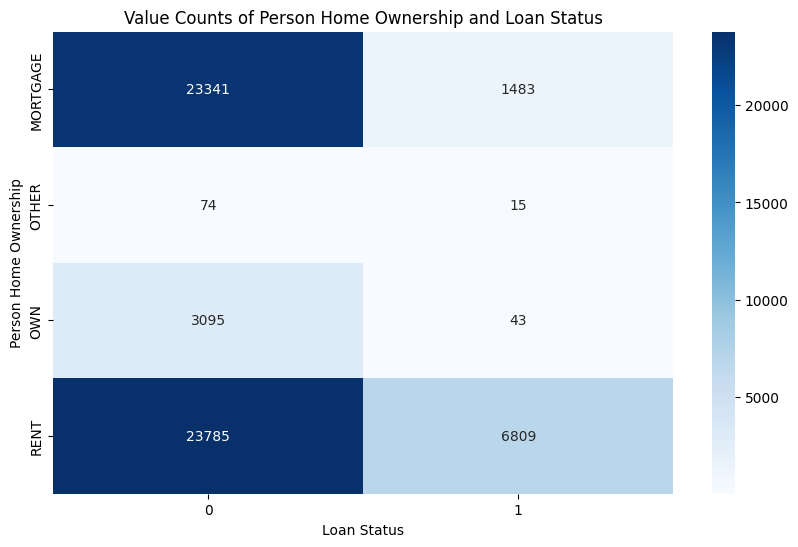

In [17]:
# Get the value counts
value_counts = df_train[["person_home_ownership", "loan_status"]].value_counts()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(value_counts.unstack().fillna(0), annot=True, cmap="Blues", fmt="d")

# Set the title and labels
plt.title("Value Counts of Person Home Ownership and Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Person Home Ownership")

plt.show()

- Output

The output of this code is a heatmap plot that visualizes the value counts of the person_home_ownership and loan_status columns in the df_train DataFrame. The x-axis represents the loan_status column, the y-axis represents the person_home_ownership column, and the color of each cell represents the count of each combination.

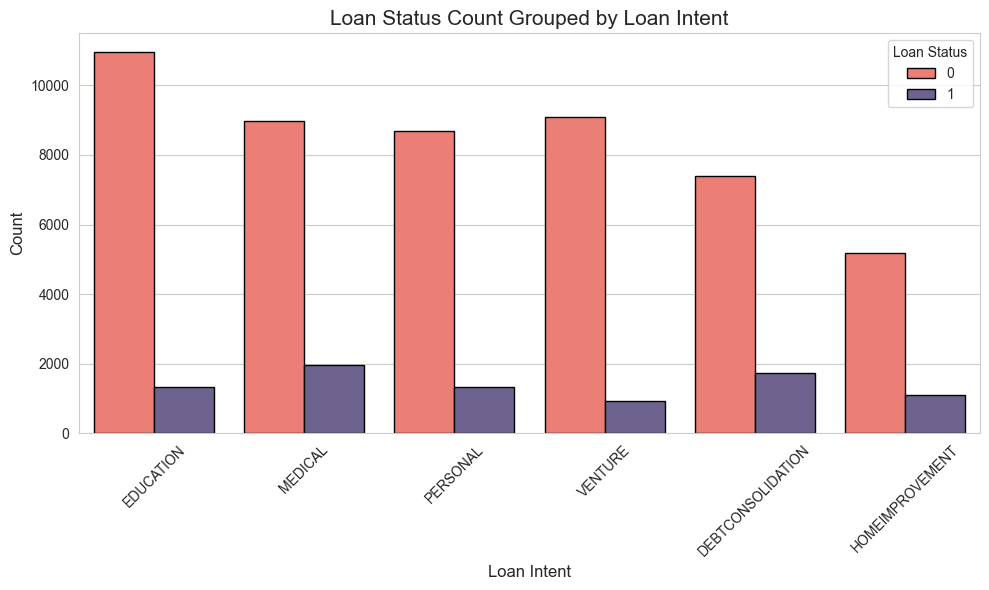

In [18]:
# Set the clean theme
sns.set_style("whitegrid")

# Custom vibrant color palette
custom_palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the count of loan_status grouped by loan_intent with the new color palette
sns.countplot(data=df_train, x="loan_intent", hue="loan_status", palette=custom_palette, edgecolor="black")

plt.title("Loan Status Count Grouped by Loan Intent", fontsize=15)
plt.xlabel("Loan Intent", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Loan Status", fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
df_train["loan_int_rate"].value_counts()

loan_int_rate
10.99    2183
7.51     2150
7.88     1759
7.49     1609
13.49    1412
         ... 
8.45        1
17.44       1
20.25       1
7.94        1
10.03       1
Name: count, Length: 362, dtype: int64

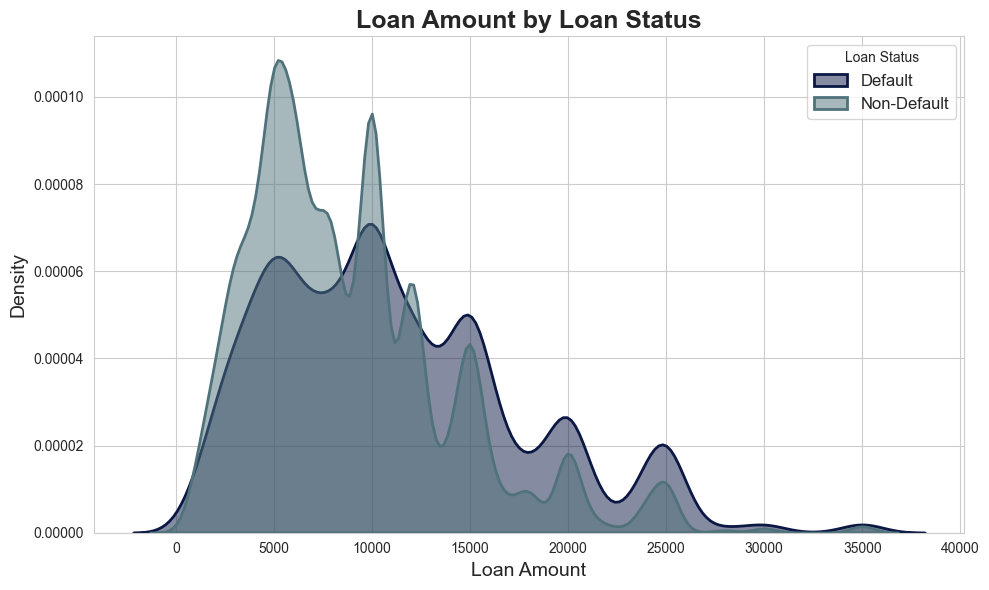

In [20]:
sns.set_style("whitegrid")

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True, color='#0C1844', alpha=0.5, linewidth=2)  # Coral color
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True, color='#50727B', alpha=0.5, linewidth=2)  # Purple color

# Set title and labels with enhanced font sizes
plt.title('Loan Amount by Loan Status', fontsize=18, fontweight='bold')
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend(title='Loan Status', fontsize=12)

plt.tight_layout()
plt.show()


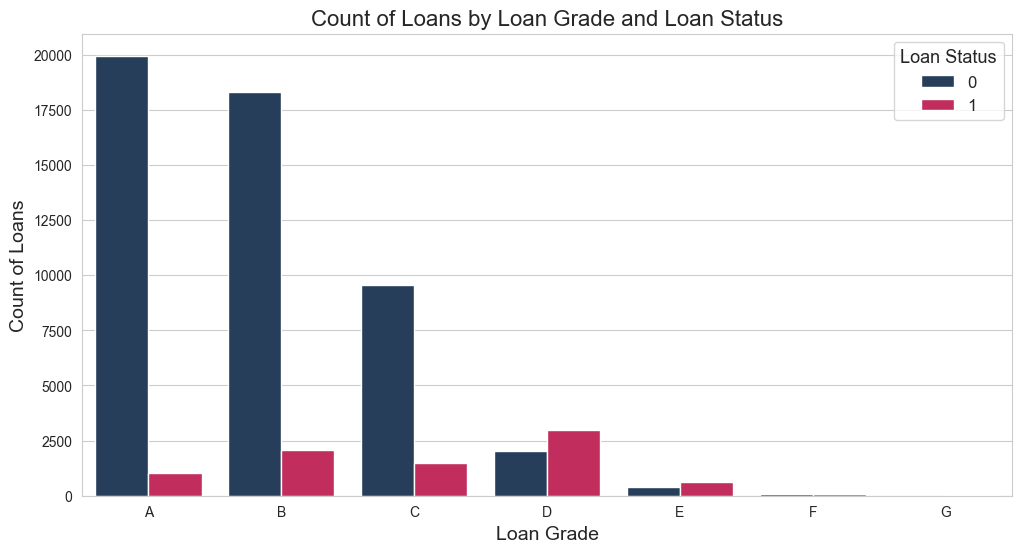

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='loan_grade', hue='loan_status', palette=['#1E3E62', '#D91656'], order=sorted(df_train['loan_grade'].unique()))
plt.title('Count of Loans by Loan Grade and Loan Status', fontsize=16)
plt.xlabel('Loan Grade', fontsize=14)
plt.ylabel('Count of Loans', fontsize=14)
plt.legend(title='Loan Status', title_fontsize='13', fontsize='12')
plt.show()

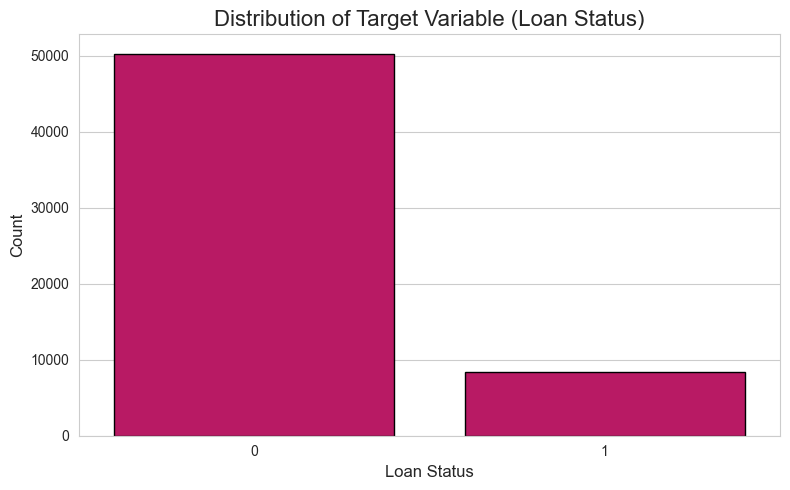

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with a vibrant color
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df_train, color='#D20062', edgecolor='black')  # Coral color

# Set title and labels
plt.title('Distribution of Target Variable (Loan Status)', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


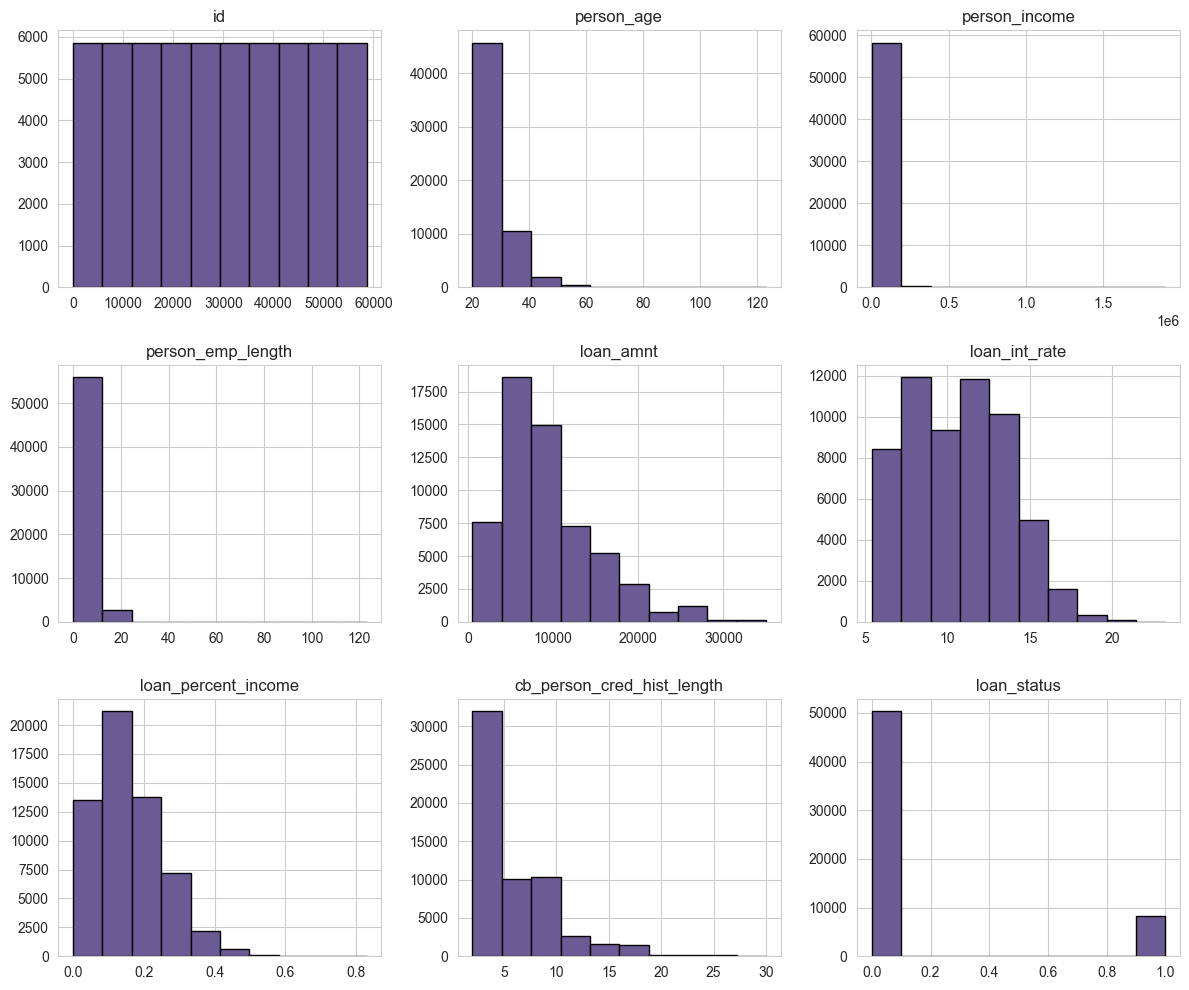

In [23]:
# Histograms for each column in df_train
df_train.hist(figsize=(12, 10), color='#6B5B95', edgecolor='black')  

plt.tight_layout()

plt.show()


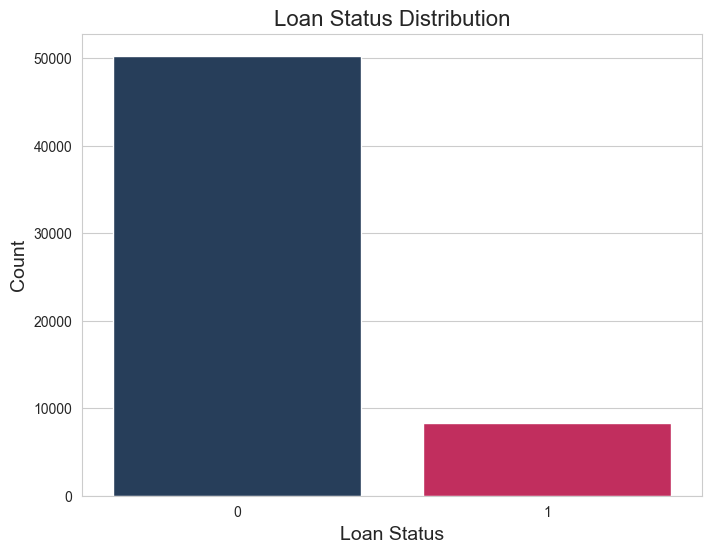

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train["loan_status"],palette=['#1E3E62', '#D91656'])
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# **PreProcessing**

In [25]:
num_cols = list(df_train.select_dtypes(exclude=['object']).columns.difference(['loan_status']))
cat_cols = list(df_train.select_dtypes(include=['object']).columns)

num_cols_test = list(df_test.select_dtypes(exclude=['object']).columns)
cat_cols_test = list(df_test.select_dtypes(include=['object']).columns)

In [26]:
# Encoding the categorical columns
labelencoder = LabelEncoder()
for col_name in cat_cols:
    df_train[col_name]=labelencoder.fit_transform(df_train[col_name]).astype(int)
    df_test[col_name]=labelencoder.transform(df_test[col_name]).astype(int)

In [27]:
# Scaling the train and test data
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [28]:
df_train = df_train.drop("id", axis=1)

# **Model**

In [29]:
X = df_train.drop(['loan_status'], axis=1)
y = df_train['loan_status']
test = df_test.drop(['id'],axis=1)

In [30]:
SEED = 42
n_splits = 11

def train_model(model, X, y):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    train_scores = []
    val_scores = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
        train_scores.append(train_auc)

        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        val_accurcy = roc_auc_score(y_val, y_val_pred_proba)
        val_scores.append(val_accurcy)

        print(f"Fold {fold}: Train AUC = {train_auc:.4f}, Validation AUC = {val_accurcy:.4f}")

    mean_train_accurcy = np.mean(train_scores)
    mean_val_accurcy = np.mean(val_scores)

    print(f"\nMean Train AUC: {mean_train_accurcy:.4f}")
    print(f"Mean Validation AUC: {mean_val_accurcy:.4f}")

    return model, train_scores, val_scores

In [31]:
XGB_Params = {'max_depth': 11,
 'learning_rate': 0.08519184961043755,
 'n_estimators': 526,
 'min_child_weight': 7,
 'gamma': 0.8836107194006716,
 'subsample': 0.9716472941489204,
 'colsample_bytree': 0.43023334197969365,
 'reg_alpha': 6.041292445595731,
 'reg_lambda': 3.0256296220488377,
 'max_delta_step': 5,
 'scale_pos_weight': 2.2304827035887316}

model = XGBClassifier(**XGB_Params,
                       use_label_encoder=False, 
                       eval_metric='auc',
                       random_state=SEED,
                       verbose=-1,
                       device='gpu')

trained_model, train_scores, val_scores = train_model(model, X, y)

Fold 1: Train AUC = 0.9826, Validation AUC = 0.9538
Fold 2: Train AUC = 0.9831, Validation AUC = 0.9554
Fold 3: Train AUC = 0.9824, Validation AUC = 0.9582
Fold 4: Train AUC = 0.9823, Validation AUC = 0.9621
Fold 5: Train AUC = 0.9824, Validation AUC = 0.9547
Fold 6: Train AUC = 0.9832, Validation AUC = 0.9555
Fold 7: Train AUC = 0.9835, Validation AUC = 0.9541
Fold 8: Train AUC = 0.9827, Validation AUC = 0.9630
Fold 9: Train AUC = 0.9824, Validation AUC = 0.9569
Fold 10: Train AUC = 0.9830, Validation AUC = 0.9571
Fold 11: Train AUC = 0.9826, Validation AUC = 0.9599

Mean Train AUC: 0.9827
Mean Validation AUC: 0.9574


In [32]:
# import lightgbm as lgb

# # Define LightGBM parameters
# LGB_Params = {
#     'boosting_type': 'gbdt',
#     'max_depth': 11,
#     'learning_rate': 0.085,
#     'n_estimators': 526,
#     'min_child_weight': 7,
#     'subsample': 0.971,
#     'colsample_bytree': 0.430,
#     'reg_alpha': 6.041,
#     'reg_lambda': 3.025,
#     'scale_pos_weight': 2.230
# }

# # Initialize LightGBM model with parameters
# model = lgb.LGBMClassifier(**LGB_Params, random_state=SEED,
#                            eval_metric='auc',
#                            verbose=-1,
#                            device="gpu")

# # Train the LightGBM model using your train_model function
# trained_model, train_scores, val_scores = train_model(model, X, y)


In [33]:
# import optuna
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# import numpy as np
# from catboost import CatBoostClassifier  # Importing CatBoost

# SEED = 42
# n_splits = 12

# def train_model(model, X, y):
#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
#     train_scores = []
#     val_scores = []
    
#     best_val_auc = 0
#     best_fold = -1

#     for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
#         X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[test_index]

#         model.fit(X_train, y_train, verbose=0)  # Set verbose=0 to suppress output

#         y_train_pred_proba = model.predict_proba(X_train)[:, 1]
#         train_auc = roc_auc_score(y_train, y_train_pred_proba)
#         train_scores.append(train_auc)

#         y_val_pred_proba = model.predict_proba(X_val)[:, 1]
#         val_auc = roc_auc_score(y_val, y_val_pred_proba)
#         val_scores.append(val_auc)

#         print(f"Fold {fold}: Train AUC = {train_auc:.4f}, Validation AUC = {val_auc:.4f}")

#         # Check for the best validation AUC
#         if val_auc > best_val_auc:
#             best_val_auc = val_auc
#             best_fold = fold

#     mean_train_auc = np.mean(train_scores)
#     mean_val_auc = np.mean(val_scores)

#     print(f"\nMean Train AUC: {mean_train_auc:.4f}")
#     print(f"Mean Validation AUC: {mean_val_auc:.4f}")
#     print(f"Best Validation AUC is from Fold {best_fold} with AUC = {best_val_auc:.4f}")

#     return model, train_scores, val_scores

# def objective(trial):
#     print(f"Starting trial {trial.number}...")
    
#     # Define the hyperparameter search space for CatBoost
#     CatBoost_Params = {
#         'depth': trial.suggest_int('depth', 3, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10.0),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
#         'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1, 10),
#         'random_seed': SEED,
#         'verbose': 0  # Suppress CatBoost output
#     }

#     # Initialize CatBoost model with parameters from Optuna trial
#     model = CatBoostClassifier(**CatBoost_Params)
    
#     # Train the CatBoost model and return the mean validation AUC
#     _, _, val_scores = train_model(model, X, y)
#     mean_val_auc = np.mean(val_scores)
#     print(f"Trial {trial.number} completed: Validation AUC = {mean_val_auc:.4f}")
    
#     return mean_val_auc

# # Create an Optuna study
# study = optuna.create_study(direction='maximize')
# print("Starting Optuna hyperparameter tuning...")
# study.optimize(objective, n_trials=10)

# # Output the best hyperparameters found
# print("Best hyperparameters: ", study.best_params)
# print("Best validation AUC: ", study.best_value)


In [34]:
    # model = CatBoostClassifier(
    #     loss_function='Logloss',
    #     eval_metric='AUC',
    #     learning_rate=0.05,
    #     iterations=1000,
    #     depth=9,
    #     random_strength=0,
    #     l2_leaf_reg=0.5,
    #     task_type='GPU',
    #     random_seed=42,
    #     verbose=False
    # )


In [35]:
# Test_pred = trained_model.predict_proba(test)[:, 1]

In [45]:
# # save the model
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)
    

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

# **Submission**

In [47]:
# # sample_submission.head()
# submission = trained_model.predict_proba(test)[:, 1]
# submission

array([0.9958747 , 0.01878393, 0.77966761, ..., 0.01551796, 0.3533638 ,
       0.96676495])

In [48]:
# df_sample['loan_status'] = submission
# df_sample.head()

,id,loan_status
0,58645,0.995875
1,58646,0.018784
2,58647,0.779668
3,58648,0.021237
4,58649,0.064680


In [49]:
#Original submission
# sample_submission.to_csv(r"D:/Kaggle/Loan Approval Pred/playground-series-s4e10/sample_submission.csv", index=False)


In [50]:
# # New submission
# df_sample.to_csv(r"D:/Kaggle/Loan Approval Pred/playground-series-s4e10/New_submission.csv", index=False)
